In [2]:
!pip install pandas numpy matplotlib seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable


<h1>Importing Modules</h1>

In [3]:
import zipfile
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
pd.set_option('display.max_columns',None)
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
warnings.filterwarnings('ignore')

<h4>Importing the Data</h4>

In [5]:
path="C:\\Users\\User\\Documents\\Zomato Restaurant Project\\zomato.zip"
with zipfile.ZipFile(path,'r') as file:
    file.extract('zomato.csv','C:\\Users\\User\\Documents\\Zomato Restaurant Project\\')

In [6]:
df=pd.read_csv('C:\\Users\\User\\Documents\\Zomato Restaurant Project\\zomato.csv',encoding='latin-1')
code=pd.read_excel('C:\\Users\\User\\Documents\\Zomato Restaurant Project\\Country-Code.xlsx')

In [7]:
code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


<h1>Statistical Analysis</h1>

In [8]:
#Data shape
print('---------Restaurant_data----------')
print(f'Rows in Restaurant_data: {df.shape[0]}\nColumns in Restaurant_data: {df.shape[1]}')
print('-----------Country_Code_data------------')
print(f'Rows in Country_Code_data: {code.shape[0]}\nColumns in Country_Code_data: {code.shape[1]}')

---------Restaurant_data----------
Rows in Restaurant_data: 9551
Columns in Restaurant_data: 21
-----------Country_Code_data------------
Rows in Country_Code_data: 15
Columns in Country_Code_data: 2


In [9]:
#Data describe
print('=='*10)
print("Data Describe")
print('=='*10)
df.describe()

Data Describe


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
#data information
print('=='*10)
print("Data Information")
print('=='*10)
df.info()

Data Information
<class 'pandas.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   str    
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   str    
 4   Address               9551 non-null   str    
 5   Locality              9551 non-null   str    
 6   Locality Verbose      9551 non-null   str    
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   str    
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   str    
 12  Has Table booking     9551 non-null   str    
 13  Has Online delivery   9551 non-null   str    
 14  Is delivering now     9551 non-null   str    
 15  Switch to order

<h1>Data Preprocessing</h1>

1.duplicate value
2.missing value
3.missing value percentage
4.imputing or remove null values
5.formating the column names 
6.droping the noise columns
7.changing the values from yes/no to 0/1

<h3>Handling Duplicate Values</h3>

In [11]:
#Duplicate Values
print('=='*10)
print(f"No of duplicated rows : {df.duplicated().sum(axis=0)}")
print('=='*10)
print(f'No of duplicates based on combined comlumns(Restuarant Name and Address): {df.duplicated(subset=['Restaurant Name','Address']).sum()}')
print('=='*10)

No of duplicated rows : 0
No of duplicates based on combined comlumns(Restuarant Name and Address): 0


<h3>Handling Missing Values</h3>

In [12]:
#Missing Values
print('=='*10)
print(f'No of Null Values: \n{df.isna().sum()}')
print('=='*10)

No of Null Values: 
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [13]:
#Columns having Null Values
print('=='*10)
print(f'Columns having Null Values : {[col for col in df.columns if df[col].isna().sum()>0]}')
print('=='*10)

Columns having Null Values : ['Cuisines']


In [14]:
#Drop null if greater than threshold else impute
threshold=0.05
cuisine_null_percentage=(
    df['Cuisines'].isna().sum()/df.shape[0]
)
print(f'The percentage of Null values in Cuisines Columns: {cuisine_null_percentage}')
print(f'Before Droping : {df.shape}')
if cuisine_null_percentage<=threshold:
    df=df.dropna(axis=0)
    print(f'After Droping : {df.shape}')
else:
    df=df.fillna(df['Cuisines'].mode()[0])

The percentage of Null values in Cuisines Columns: 0.0009423097057899697
Before Droping : (9551, 21)
After Droping : (9542, 21)


<h3>Droping Noise Columns</h3>

In [15]:
#Droping noise columns
columns=['Restaurant ID','Locality Verbose','Longitude','Latitude','Is delivering now','Switch to order menu']
df.drop(columns=columns,inplace=True)
print(f'The Columns after Droping :\n{df.columns}')

The Columns after Droping :
Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='str')


<h3>Formating Columns</h3>

In [16]:
#Formating Column Names
print(f'------------Before Formating:------------\n{df.columns}')
df.columns=df.columns.str.lower().str.strip().str.replace(' ','_')#replace the space with underscore and strip the extra spaces 
#Rename the columns 
df=df.rename(columns={'average_cost_for_two':'cost','has_table_booking':'table_booking','has_online_delivery':'online_delivery'})
print(f'------------After Formating:-------------\n{df.columns}')

------------Before Formating:------------
Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='str')
------------After Formating:-------------
Index(['restaurant_name', 'country_code', 'city', 'address', 'locality',
       'cuisines', 'cost', 'currency', 'table_booking', 'online_delivery',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='str')


<h3>Replace Yes/No and Changing Datatype</h3>

In [17]:
#Replace yes/no to 0/1
column=['table_booking','online_delivery']
mapping={'Yes':1,'No':0}
df[column]=df[column].apply(lambda col:col.map(mapping)).astype(np.int32)


In [18]:
#Changing the columns datatype
col=['country_code','cost','price_range','votes']
df[col]=df[col].astype('int32')
df['aggregate_rating']=df['aggregate_rating'].astype('float32')

In [19]:
df.info()

<class 'pandas.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   restaurant_name   9542 non-null   str    
 1   country_code      9542 non-null   int32  
 2   city              9542 non-null   str    
 3   address           9542 non-null   str    
 4   locality          9542 non-null   str    
 5   cuisines          9542 non-null   str    
 6   cost              9542 non-null   int32  
 7   currency          9542 non-null   str    
 8   table_booking     9542 non-null   int32  
 9   online_delivery   9542 non-null   int32  
 10  price_range       9542 non-null   int32  
 11  aggregate_rating  9542 non-null   float32
 12  rating_color      9542 non-null   str    
 13  rating_text       9542 non-null   str    
 14  votes             9542 non-null   int32  
dtypes: float32(1), int32(6), str(8)
memory usage: 931.8 KB


In [20]:
code.columns=code.columns.str.lower().str.strip().str.replace(' ','_')

<h3>Final Dataset</h3>

In [21]:
#Merge the dataset on country code
final_df=df.merge(code,on='country_code',how='left')

<h1>Exploratory Data Analysis</h1>

The Total Countries where Zomato is Operating: 15
The Counts of Restaurant in Each Country:
1. India - 8652
2. United States - 425
3. United Kingdom - 80
4. Brazil - 60
5. UAE - 60
6. South Africa - 60
7. New Zealand - 40
8. Turkey - 34
9. Australia - 24
10. Phillipines - 22
11. Indonesia - 21
12. Singapore - 20
13. Qatar - 20
14. Sri Lanka - 20
15. Canada - 4





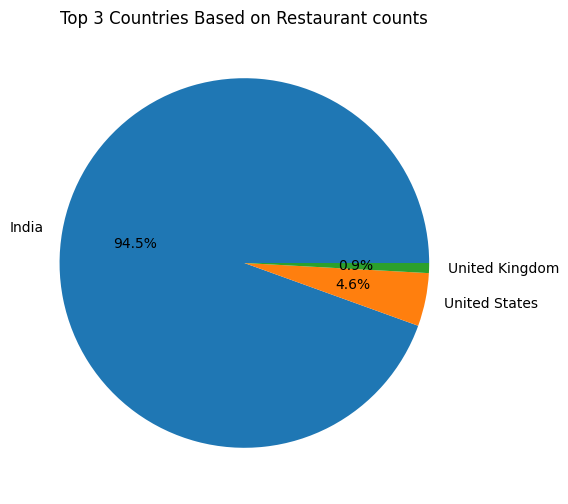

In [22]:
#Now lets look at the country where zomato is used.
print(f'The Total Countries where Zomato is Operating: {final_df['country'].nunique()}')

#Now lets look at the restaurant counts for each country
print('The Counts of Restaurant in Each Country:')
country_counts=final_df['country'].value_counts()
for i,(name,count) in enumerate(country_counts.items()):
    print(f'{i+1}. {name} - {count}')
print('\n\n')
#visualize the top 3 country based on restaurant count

plt.pie(country_counts.values[:3],labels=country_counts.index[:3],autopct="%1.1f%%")
plt.title('Top 3 Countries Based on Restaurant counts')
plt.show()

<b>Insights:
<ul><li>India contains the most number of restaurants.</ul>

In [23]:
# Country and their Currency
country_currency=final_df.groupby('country_code')[['country','currency']].first().reset_index()
country_currency

,country_code,country,currency
0,1,India,Indian Rupees(Rs.)
1,14,Australia,Dollar($)
2,30,Brazil,Brazilian Real(R$)
3,37,Canada,Dollar($)
4,94,Indonesia,Indonesian Rupiah(IDR)
5,148,New Zealand,NewZealand($)
6,162,Phillipines,Botswana Pula(P)
7,166,Qatar,Qatari Rial(QR)
8,184,Singapore,Dollar($)
9,189,South Africa,Rand(R)


<b>Insights:
<ul><li>4 countries who uses dollar as their currency.</ul>

In [24]:
# Lets look at Rates Distribution
ratings=final_df.groupby(['aggregate_rating','rating_color','rating_text'])\
    .size().reset_index().rename(columns={0:'size'}).sort_values(by='aggregate_rating')
ratings

,aggregate_rating,rating_color,rating_text,size
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


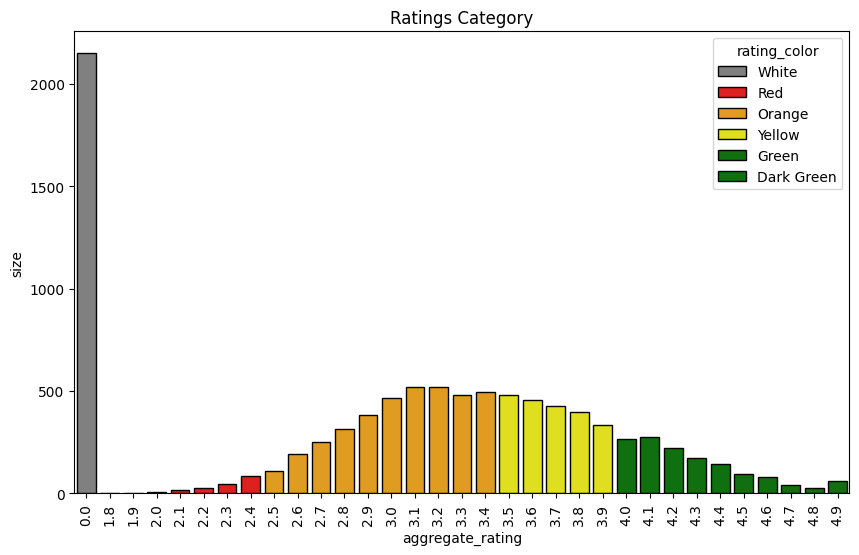

In [25]:
sns.barplot(
    data=ratings,
    x='aggregate_rating',
    y='size',
    order=df['aggregate_rating'].sort_values().astype(str).tolist(),
    hue='rating_color',
    palette=['grey', 'red', 'orange', 'yellow', 'green', 'green'],
    edgecolor='black'
)
plt.title("Ratings Category")
plt.xticks(rotation=90)
plt.show()

<b>Insights:<ul>
    <li>Count of Restaurants with 0 ratings are very high.
    <li>These Restaurants are likely new or unrated.
    <li>We should explude them from rating analysis.
    <li>The Average rating is ~3.2 excluding 0 ratings.
</ul>

<Axes: xlabel='count', ylabel='rating_text'>

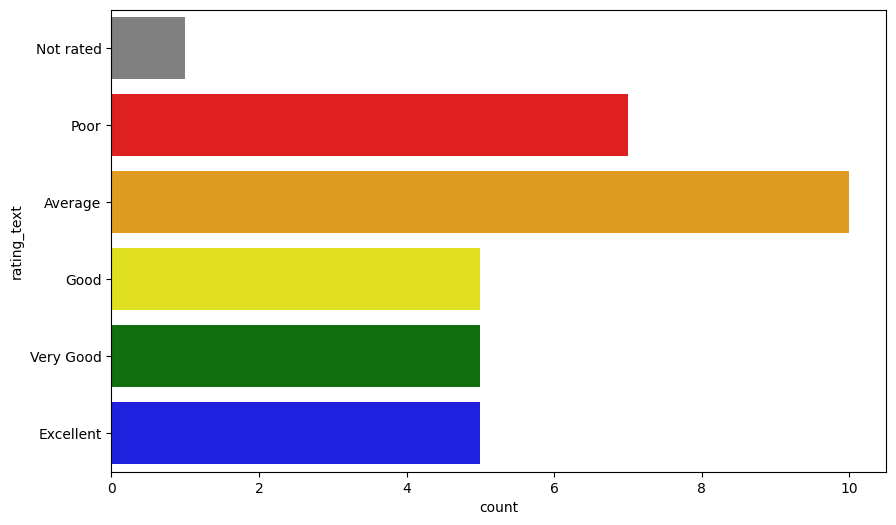

In [26]:
sns.countplot(ratings,y='rating_text',palette=['grey','red','orange','yellow','green','blue'],stat='count')

<b>Insights:<ul>
    <li>Average Rated Restaurant- higher counts,targets for uplift.
    <li>Good,Very Good- consistent performers.
    <li>Excellent- Fewer counts.
    <li>Poor- Needs to Focus on Improvements.
</ul>

The Countries having 0 rated Restaurants are: 
1. India : 2139
2. Brazil : 5
3. United States : 3
4. United Kingdom : 1


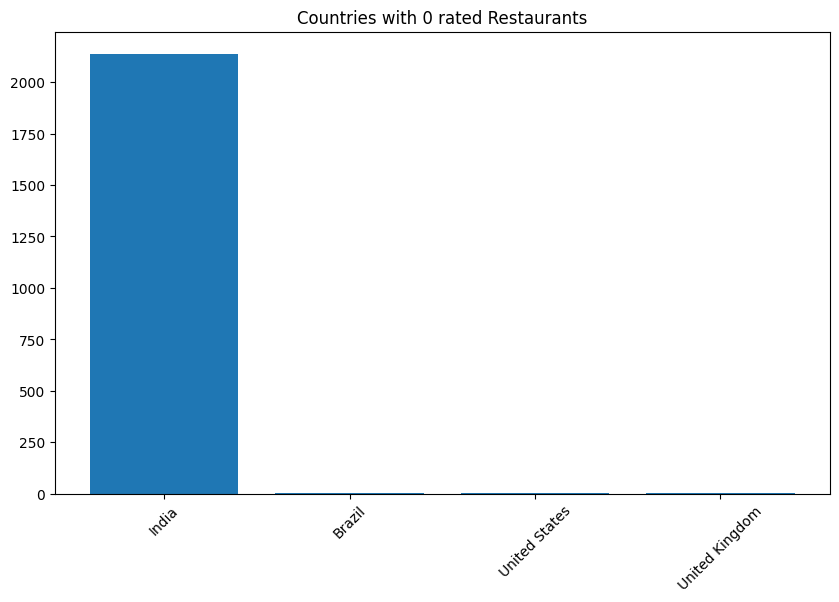

In [27]:
#what are the counts of country having 0 rated restaurant?
print(f"The Countries having 0 rated Restaurants are: ")
country_0_rated=final_df[final_df['aggregate_rating']==0.0]['country'].value_counts()
for i,(name,count) in enumerate(country_0_rated.items()):
    print(f'{i+1}. {name} : {count}')
plt.bar(country_0_rated.index,country_0_rated.values)
plt.title('Countries with 0 rated Restaurants')
plt.xticks(rotation=45)
plt.show()

<b>Insights:<ul>
    <li>India contains the most Restaurant with 0 ratings.

<h2>Filtering Data For Indian Restaurants.</h2>

In [28]:
#Filter the data by country India
india_df=final_df[final_df['country']=='India']
india_df.shape

(8652, 16)

The City and their restaurant counts:
1. New Delhi : 5473
2. Gurgaon : 1118
3. Noida : 1080
4. Faridabad : 251
5. Ghaziabad : 25
6. Ahmedabad : 21
7. Amritsar : 21
8. Bhubaneshwar : 21
9. Guwahati : 21
10. Lucknow : 21
11. Agra : 20
12. Allahabad : 20
13. Aurangabad : 20
14. Bangalore : 20
15. Bhopal : 20
16. Chennai : 20
17. Coimbatore : 20
18. Dehradun : 20
19. Goa : 20
20. Indore : 20
21. Jaipur : 20
22. Kanpur : 20
23. Kochi : 20
24. Kolkata : 20
25. Ludhiana : 20
26. Mangalore : 20
27. Mumbai : 20
28. Mysore : 20
29. Nagpur : 20
30. Nashik : 20
31. Patna : 20
32. Puducherry : 20
33. Pune : 20
34. Ranchi : 20
35. Surat : 20
36. Vadodara : 20
37. Varanasi : 20
38. Vizag : 20
39. Chandigarh : 18
40. Hyderabad : 18
41. Secunderabad : 2
42. Mohali : 1
43. Panchkula : 1


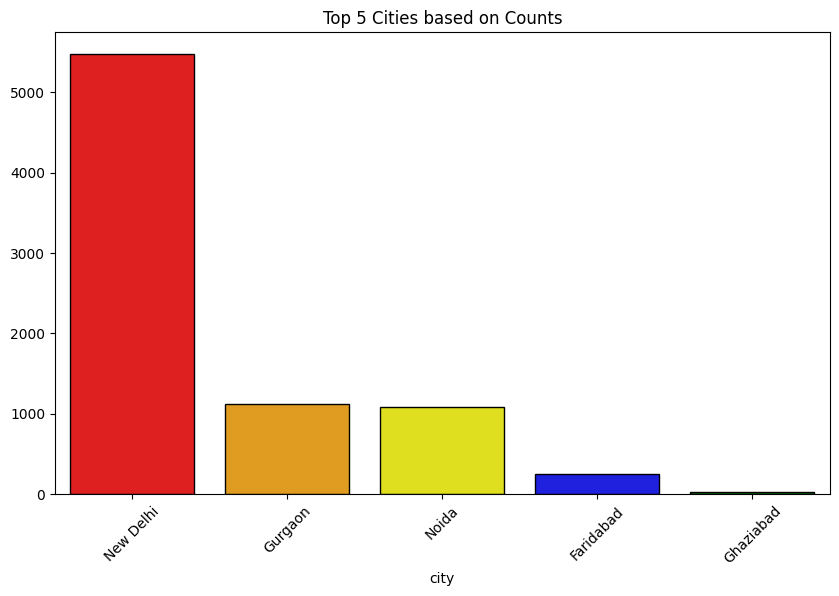

In [29]:
#Now lets check the unique cities and their counts
city_count=india_df['city'].value_counts()
print('The City and their restaurant counts:')
for i ,(name,count) in enumerate(city_count.items()):
    print(f'{i+1}. {name} : {count}')
#Top 5 cities based on restaurant counts
sns.barplot(
    x=city_count.index[:5],
    y=city_count.values[:5],
    palette=['red','orange','yellow','blue','green'],
    edgecolor='black'
)
plt.title('Top 5 Cities based on Counts')
plt.xticks(rotation=45)
plt.show()

<b>Insights:<ul>
    <li>New Delhi contains Most Restaurants.

The Top 10 Restaurant Chains in India:
1. Cafe Coffee Day : 83
2. Domino's Pizza : 79
3. Subway : 63
4. Green Chick Chop : 51
5. McDonald's : 48
6. Keventers : 34
7. Pizza Hut : 29
8. Giani : 29
9. Baskin Robbins : 28
10. Barbeque Nation : 25


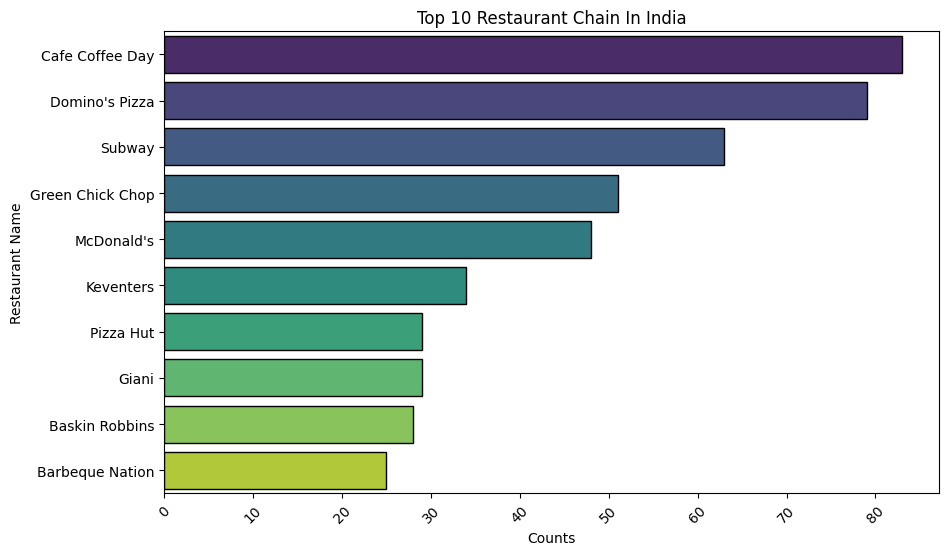

In [36]:
# Top 10 Restaurant Chains.
restaurant_chain=india_df['restaurant_name'].value_counts()
print("The Top 10 Restaurant Chains in India:")
for i,(name,val) in enumerate(restaurant_chain.items()):
    if i==10:
        break
    print(f'{i+1}. {name} : {val}')
sns.barplot(
    x=restaurant_chain.values[:10],
    y=restaurant_chain.index[:10],
    palette='viridis',
    edgecolor='black'
)
plt.title("Top 10 Restaurant Chain In India")
plt.xlabel('Counts')
plt.ylabel('Restaurant Name')
plt.show()

<b>Insights:<ul><li>Cafe Coffee Day has the Largest Chain in India after that Domino's and subway.

In [64]:
#Lets explode the cuisines column
cuisines_df=(india_df.assign(
    cuisine=india_df['cuisines'].str.split(',')
).explode('cuisine'))
cuisines_df['cuisine']=cuisines_df['cuisine'].str.strip()
print(f'Before Exploding : {india_df.shape}\nAfter Exploding : {cuisines_df.shape}')

Before Exploding : (8652, 16)
After Exploding : (17854, 17)


Top 10 Cuisines in India:
1. North Indian : 3946
2. Chinese : 2690
3. Fast Food : 1963
4. Mughlai : 992
5. Bakery : 726
6. Continental : 724
7. Italian : 682
8. South Indian : 631
9. Cafe : 627
10. Desserts : 597


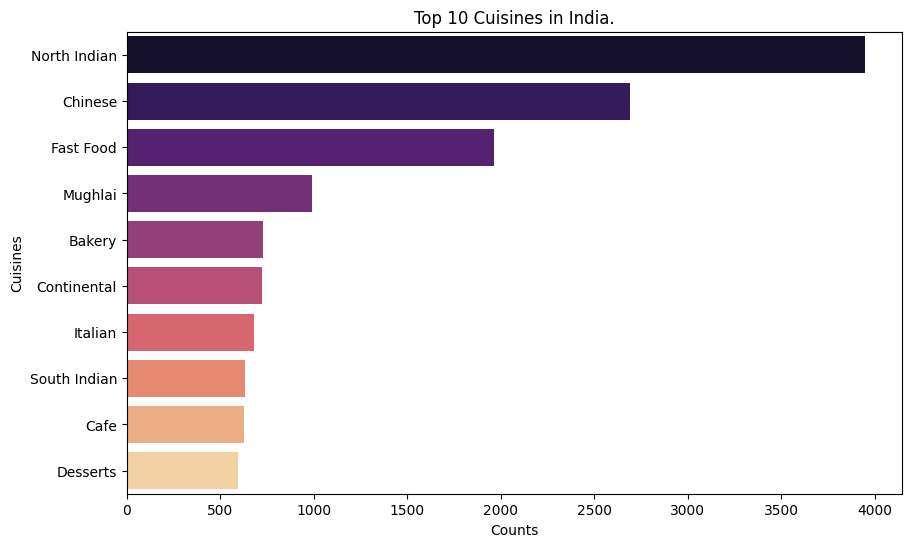

In [68]:
#Top 10 Cuisine in India
top_10_cuisines=cuisines_df['cuisine'].value_counts()[:10]
print("Top 10 Cuisines in India:")
for i,(name,val) in enumerate(top_10_cuisines.items()):
    print(f"{i+1}. {name} : {val}")
sns.barplot(x=top_10_cuisines.values,y=top_10_cuisines.index,palette='magma')
plt.title('Top 10 Cuisines in India.')
plt.xlabel("Counts")
plt.ylabel("Cuisines")
plt.show()

<b>Insights:<ul><li>North Indian food is served by most of the Restaurants followed by Chinese then Fast Food.

In [77]:
#Lets Perform the rating Analysis
ratings_df=cuisines_df[cuisines_df['aggregate_rating']!=0.0]
ratings_df.shape

(14428, 17)

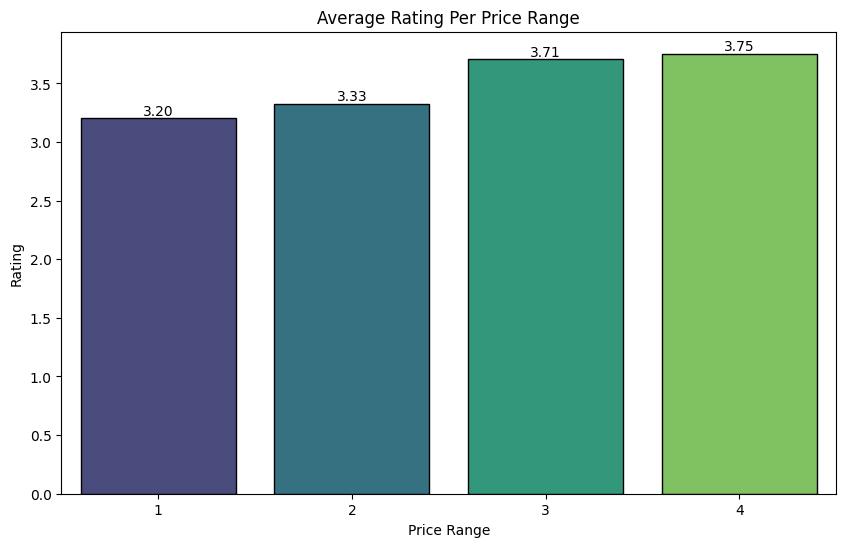

In [94]:
#calculate the average rating per price range
avg_rating_per_price_range=ratings_df.groupby('price_range')['aggregate_rating'].mean().reset_index()
ax=sns.barplot(
    data=avg_rating_per_price_range,
    x='price_range',
    y='aggregate_rating',
    palette='viridis',
    edgecolor='black'
)
for bar in ax.patches:
    height=bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2,height,f"{height:.2f}",ha='center',va='bottom')
plt.title('Average Rating Per Price Range')
plt.xlabel("Price Range")
plt.ylabel("Rating")
plt.show()

<b>Insights:<ul><li>Higher price range tends to have higher ratings.

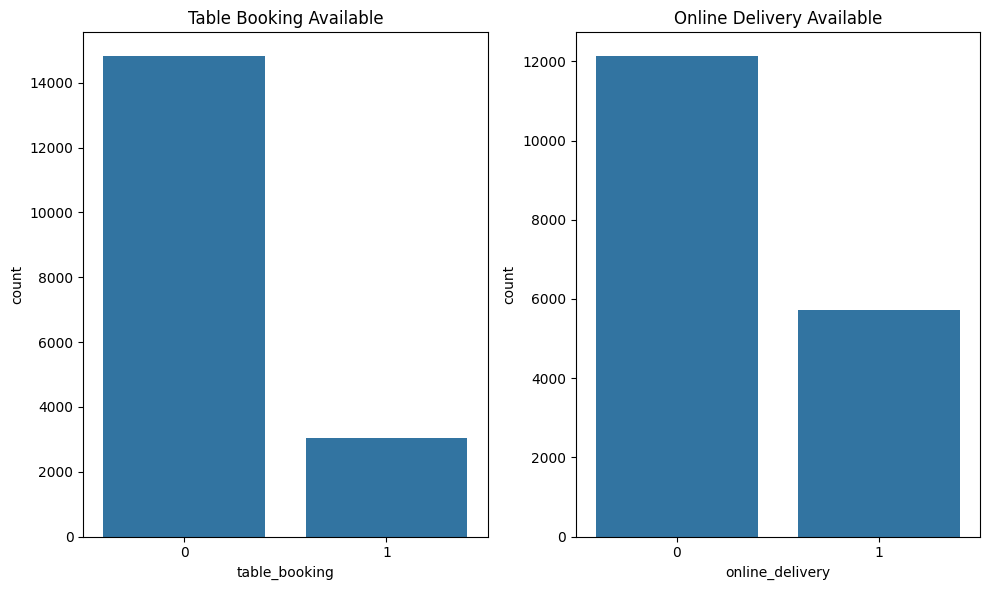

In [101]:
_,ax=plt.subplots(1,2)
sns.countplot(cuisines_df,x='table_booking',ax=ax[0])
ax[0].set_title('Table Booking Available')
sns.countplot(cuisines_df,x='online_delivery',ax=ax[1])
ax[1].set_title('Online Delivery Available')
plt.tight_layout()
plt.show()